In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

from astropy import table
from astropy.table import Table
from astropy.io import ascii

import matplotlib.ticker as ticker


#from astroML.plotting import setup_text_plots
#setup_text_plots(fontsize=9, usetex=True)

In [3]:
from palettable.colorbrewer.qualitative import Dark2_8
if 'plt' in locals() and hasattr(plt, 'rcParams'):
    plt.rcParams['lines.linewidth'] = 2.0
    plt.rcParams['font.size'] = 15.0
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=Dark2_8.mpl_colors)
    plt.rcParams['legend.fontsize'] = 'medium'
    plt.rcParams['legend.frameon'] = False
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['figure.figsize'] = 7, 6
    plt.rcParams['xtick.major.size'] = 6
    plt.rcParams['xtick.minor.size'] = 4
    plt.rcParams['ytick.major.size'] = 6
    plt.rcParams['ytick.minor.size'] = 4

In [4]:
SAGA_DIR   = os.environ['SAGA_DIR']

In [5]:
# READ SPECTRA
file = SAGA_DIR +'/data/saga_spectra_clean.fits.gz'
allspec = Table.read(file)

In [6]:
msats = allspec['SATS'] ==1
mlowz = (allspec['SPEC_Z'] > 0.005) & (allspec['SPEC_Z'] < 0.015)

r = allspec['r'] - allspec['EXTINCTION_R']
g = allspec['g'] - allspec['EXTINCTION_G']
gr = g-r
# SUPER HACK!!
mm= gr > 0.75
gr[mm]=0.35

dmod1 = 5.* np.log10(allspec['HOST_DIST'] * 1e6) - 5.
dmod = 5.*np.log10(1e6 * allspec['SPEC_Z']*3e5/70.) - 5.
Mr = r - dmod

reff = 1e3*allspec['HOST_DIST'] * np.sin((np.pi/180.)*allspec['PETROR50_R']/3600.)
#print reff


sb = allspec['r'] + 2.5*np.log10(2*np.pi*allspec['PETROR50_R']**2 + 1e-20)


/Users/marlageha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10
/Users/marlageha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: RuntimeWarning: invalid value encountered in log10


In [7]:
# FIND NAMED HOSTS
complete_hosts =[147100,166313,165536,61945,149781,33446,150887,132339]
incomplete_hosts = [85746,140594,161174,13927,137625,129237]

In [8]:
# FIND ONLY OBJECTS IN NAMED HOSTS
imsk = np.in1d(allspec['HOST_NSAID'], incomplete_hosts)
msk  = np.in1d(allspec['HOST_NSAID'], complete_hosts)

In [9]:
# MCCONNACHIE DATA
file = SAGA_DIR + 'data/cfht_MW_edited.txt'
mw = ascii.read(file,data_start=1)#, guess='False',format='basic')
mw.columns

MW_gr = mw['col10'] - mw['col12']
MW_r = mw['col12']
MW_reff = mw['col8']/1e3
MW_sb = mw['col14']
print mw['col1']

  col1  
--------
Sculptor
  Fornax
    LeoI
     LMC
     SMC


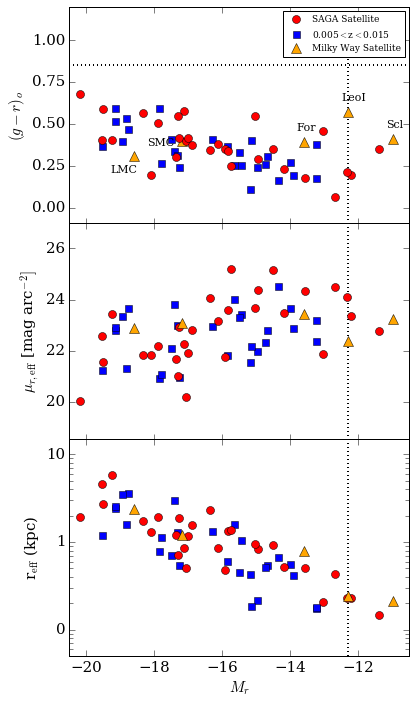

In [10]:
plt.rcParams['figure.figsize'] = 6, 10
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

# g-r
ax1.axhline(0.85, c='w')
ax1.axhline(0.85, c='k', ls=':')
ax1.axvline(-12.3, c='w')
ax1.axvline(-12.3, c='k', ls=':')

ax1.plot(Mr[msats&msk],gr[msats&msk],'ro',label='SAGA Satellite',ms=8,zorder=4)
ax1.plot(Mr[mlowz&msk&~msats],gr[mlowz&msk&~msats],'bs',label='0.005$<$z$<$0.015',ms=7,zorder=3)
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.25))
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.plot(MW_r,MW_gr,'^',color='#ffa500',ms=10,label='Milky Way Satellite')

#ax1.plot(MW_r,MW_gr,'v',color='#ba55d3',ms=10,label='M31 Satellite')


ax1.set_ylabel('$(g-r)_o$')
ax1.set_xlim(-20.5,-10.5)
ax1.set_ylim(-0.1,1.2)
ax1.legend(loc=1,fontsize=9,frameon=True,numpoints = 1)

# MW LABELS
ax1.text(MW_r[0]-0.2,MW_gr[0]+0.07,'Scl',fontsize=11)
ax1.text(MW_r[1]-0.2,MW_gr[1]+0.07,'For',fontsize=11)
ax1.text(MW_r[2]-0.2,MW_gr[2]+0.07,'LeoI',fontsize=11)
ax1.text(MW_r[3]-0.7,MW_gr[3]-0.1,'LMC',fontsize=11)
ax1.text(MW_r[4]-1.0,MW_gr[4]-0.03,'SMC',fontsize=11)
ax1.get_xaxis().set_ticklabels([])


# SB
ax2.axvline(-12.3, c='w')
ax2.axvline(-12.3, c='k', ls=':')
ax2.plot(Mr[mlowz&msk&~msats],allspec['SB_EXP_R'][mlowz&msk&~msats],'bs',label='0.005$<$z$<$0.015',ms=7)
ax2.plot(Mr[msats&msk],allspec['SB_EXP_R'][msats&msk],'ro',label='SAGA Satellites',ms=8)
ax2.set_ylabel('$\mu_{r, \mathrm{eff}}$ [mag arc$^{-2}]$')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax2.plot(MW_r,MW_sb,'^',color='#ffa500',ms=10,label='Milky Way')
ax2.get_xaxis().set_ticklabels([])


ax2.set_ylim(18.5,27)
ax2.set_xlim(-20.5,-10.5)

# SIZE AND MAGNITUDE
ax3.axvline(-12.3, c='w')
ax3.axvline(-12.3, c='k', ls=':')

ax3.plot(Mr[mlowz&msk&~msats],reff[mlowz&msk&~msats],'bs',label='0.005$<$z$<$0.015',ms=7)
ax3.plot(Mr[msats&msk],reff[msats&msk],'ro',label='SAGA Satellite',ms=8)
ax3.set_xlabel('$M_r$')
ax3.set_ylabel('r$_{\mathrm{eff}}$ (kpc)')
ax3.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax3.set_yscale('log')
ax3.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))

ax3.set_xlim(-20.5,-10.5)
ax3.set_ylim(0.05,15)

ax3.plot(MW_r,MW_reff,'^',color='#ffa500',ms=10,label='Milky Way Satellite')




plt.tight_layout(w_pad=0,h_pad=-0.1)
plt.savefig('fig_sb.pdf')



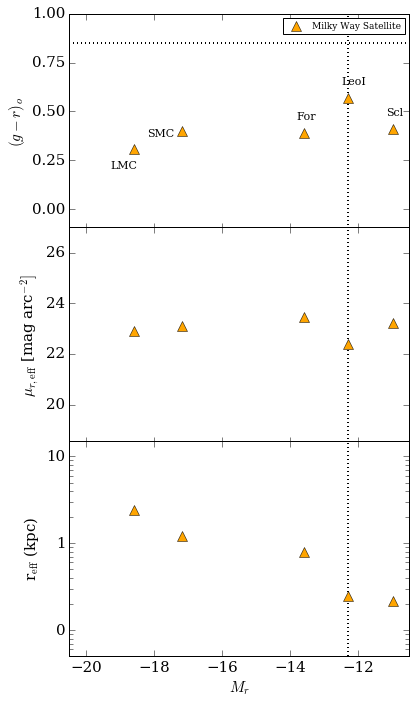

In [12]:
plt.rcParams['figure.figsize'] = 6, 10
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

# g-r
ax1.axhline(0.85, c='w')
ax1.axhline(0.85, c='k', ls=':')
ax1.axvline(-12.3, c='w')
ax1.axvline(-12.3, c='k', ls=':')

#ax1.plot(Mr[msats&msk],gr[msats&msk],'ro',label='SAGA Satellite',ms=8,zorder=4)
#ax1.plot(Mr[mlowz&msk&~msats],gr[mlowz&msk&~msats],'bs',label='0.005$<$z$<$0.015',ms=7,zorder=3)
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.25))
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.plot(MW_r,MW_gr,'^',color='#ffa500',ms=10,label='Milky Way Satellite')

#ax1.plot(MW_r,MW_gr,'v',color='#ba55d3',ms=10,label='M31 Satellite')


ax1.set_ylabel('$(g-r)_o$')
ax1.set_xlim(-20.5,-10.5)
ax1.set_ylim(-0.1,1.0)
ax1.legend(loc=1,fontsize=9,frameon=True,numpoints = 1)

# MW LABELS
ax1.text(MW_r[0]-0.2,MW_gr[0]+0.07,'Scl',fontsize=11)
ax1.text(MW_r[1]-0.2,MW_gr[1]+0.07,'For',fontsize=11)
ax1.text(MW_r[2]-0.2,MW_gr[2]+0.07,'LeoI',fontsize=11)
ax1.text(MW_r[3]-0.7,MW_gr[3]-0.1,'LMC',fontsize=11)
ax1.text(MW_r[4]-1.0,MW_gr[4]-0.03,'SMC',fontsize=11)
ax1.get_xaxis().set_ticklabels([])


# SB
ax2.axvline(-12.3, c='w')
ax2.axvline(-12.3, c='k', ls=':')
#ax2.plot(Mr[mlowz&msk&~msats],allspec['SB_EXP_R'][mlowz&msk&~msats],'bs',label='0.005$<$z$<$0.015',ms=7)
#ax2.plot(Mr[msats&msk],allspec['SB_EXP_R'][msats&msk],'ro',label='SAGA Satellites',ms=8)
ax2.set_ylabel('$\mu_{r, \mathrm{eff}}$ [mag arc$^{-2}]$')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax2.plot(MW_r,MW_sb,'^',color='#ffa500',ms=10,label='Milky Way')
ax2.get_xaxis().set_ticklabels([])


ax2.set_ylim(18.5,27)
ax2.set_xlim(-20.5,-10.5)

# SIZE AND MAGNITUDE
ax3.axvline(-12.3, c='w')
ax3.axvline(-12.3, c='k', ls=':')

#ax3.plot(Mr[mlowz&msk&~msats],reff[mlowz&msk&~msats],'bs',label='0.005$<$z$<$0.015',ms=7)
#ax3.plot(Mr[msats&msk],reff[msats&msk],'ro',label='SAGA Satellite',ms=8)
ax3.set_xlabel('$M_r$')
ax3.set_ylabel('r$_{\mathrm{eff}}$ (kpc)')
ax3.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax3.set_yscale('log')
ax3.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))

ax3.set_xlim(-20.5,-10.5)
ax3.set_ylim(0.05,15)

ax3.plot(MW_r,MW_reff,'^',color='#ffa500',ms=10,label='Milky Way Satellite')




plt.tight_layout(w_pad=0,h_pad=-0.1)
plt.savefig('fig_sb_talk.pdf')

